In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\user\\Desktop\\New folder\\Projects\\Salary Prediction\\data.csv')

In [3]:
data

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [5]:
data.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Keith,Tijuanna J",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [6]:
data.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [7]:
data.columns = data.columns.str.strip()

In [8]:
data.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [9]:
data.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [10]:
data = data.dropna(subset = ['HireDate'])

#we removed those 70 rows where HireDate is null as 70 is a very small nos wrt 18981

In [11]:
data.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

In [12]:
data = data.drop('GrossPay', axis = 1)

In [13]:
data.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [14]:
data.JobTitle.value_counts()

AIDE BLUE CHIP                 4817
POLICE OFFICER                 1866
LABORER (Hourly)                597
EMT Firefighter Suppression     358
CROSSING GUARD                  337
                               ... 
LIBRARY PROGRAM SPECIALIST        1
LIBRARY BOOKMOBILE OPERATOR       1
PC SUPPORT TECHNICIAN I           1
Water Systems Pumping Supv        1
SHERIFF                           1
Name: JobTitle, Length: 1073, dtype: int64

In [15]:
data.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02508      1
W02509      1
W02524      1
W02510      1
W02411      1
Name: AgencyID, Length: 1177, dtype: int64

In [16]:
data.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
Special City Services          4
M-R Cable & Comm               4
Name: Agency, Length: 65, dtype: int64

In [17]:
data.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
09/09/2000       1
08/17/2003       1
12/10/1999       1
10/20/2004       1
12/13/1976       1
Name: HireDate, Length: 4737, dtype: int64

In [18]:
data.AnnualSalary.value_counts()

$11310.00    4811
$20800.00     325
$29245.00     196
$43999.00     169
$44773.00     162
             ... 
$82500.00       1
$61298.00       1
$11866.00       1
$40500.00       1
$39520.00       1
Name: AnnualSalary, Length: 1590, dtype: int64

In [19]:
data['AnnualSalary'] = data['AnnualSalary'].apply(lambda x : (float)(str(x)[1:]))

In [20]:
data.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
26774.0       1
81120.0       1
44000.0       1
58041.0       1
83370.0       1
Name: AnnualSalary, Length: 1590, dtype: int64

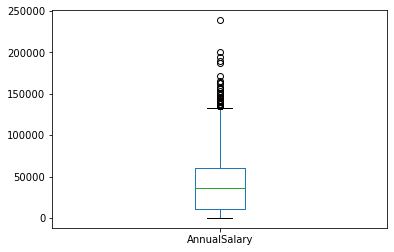

In [21]:
data.AnnualSalary.plot.box()
plt.show()

In [22]:
data.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

In [23]:
data.shape

(18911, 6)

In [24]:
data = data[data['AnnualSalary'] < 150000]

In [25]:
data.shape

(18895, 6)

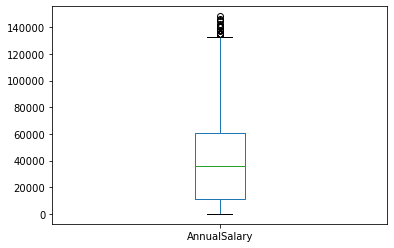

In [26]:
data.AnnualSalary.plot.box()
plt.show()

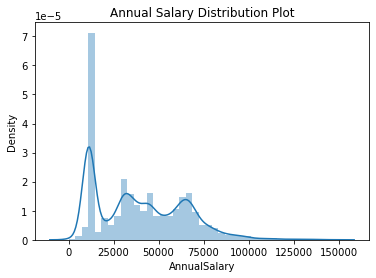

In [27]:
sns.distplot(data.AnnualSalary)
plt.title('Annual Salary Distribution Plot')
plt.show()

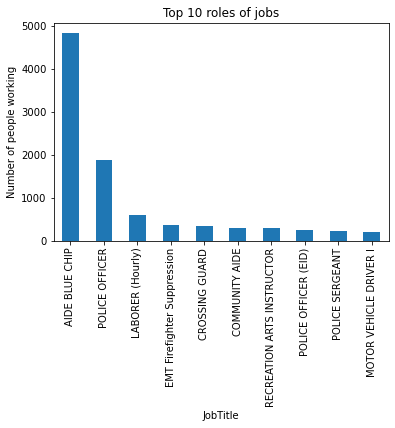

In [28]:
#Top 10 jobs
data.groupby(['JobTitle'])['Name'].count().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('Number of people working')
plt.title('Top 10 roles of jobs')
plt.show()

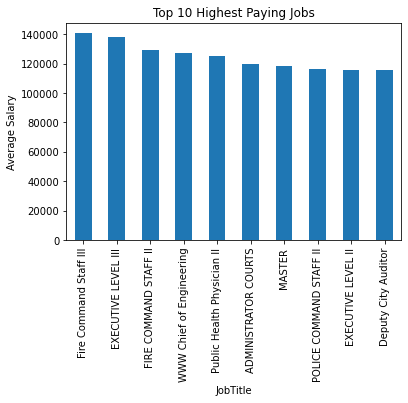

In [29]:
# Top 10 highest salaried jobs
data.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('Average Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.show()

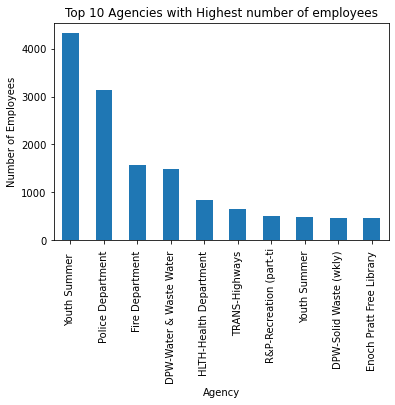

In [30]:
# Agencies with most Employees
data.groupby(['Agency'])['Name'].count().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('Number of Employees')
plt.title('Top 10 Agencies with Highest number of employees')
plt.show()

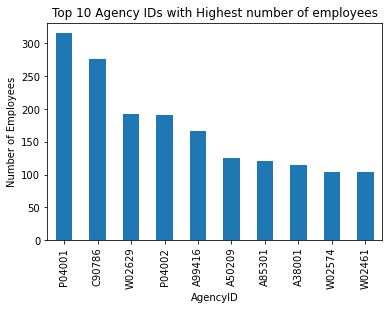

In [31]:
# Agency IDs with most Employees
data.groupby(['AgencyID'])['Name'].count().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('Number of Employees')
plt.title('Top 10 Agency IDs with Highest number of employees')
plt.show()

In [32]:
data['HireDay'] = data['HireDate'].apply(lambda x : (int)(str(x[3:5])))
data['HireMonth'] = data['HireDate'].apply(lambda x : (int)(str(x[0:2])))
data['HireYear'] = data['HireDate'].apply(lambda x : (int)(str(x[6:])))

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18895 non-null  object 
 1   JobTitle      18895 non-null  object 
 2   AgencyID      18895 non-null  object 
 3   Agency        18895 non-null  object 
 4   HireDate      18895 non-null  object 
 5   AnnualSalary  18895 non-null  float64
 6   HireDay       18895 non-null  int64  
 7   HireMonth     18895 non-null  int64  
 8   HireYear      18895 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


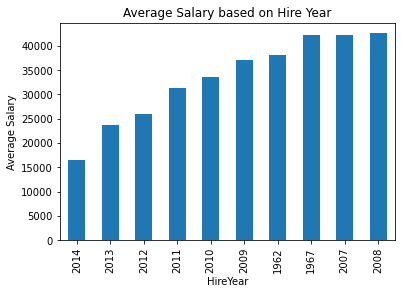

In [33]:
# Salary vs Hire Year (Top 10)
data.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel('Average Salary')
plt.title('Average Salary based on Hire Year')
plt.show()

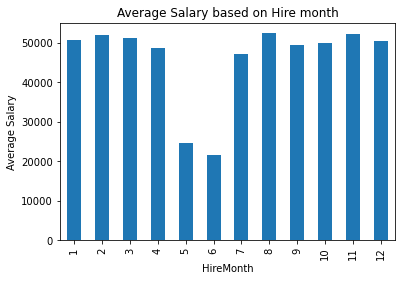

In [34]:
# Salary vs Hire Month
data.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.ylabel('Average Salary')
plt.title('Average Salary based on Hire month')
plt.show()

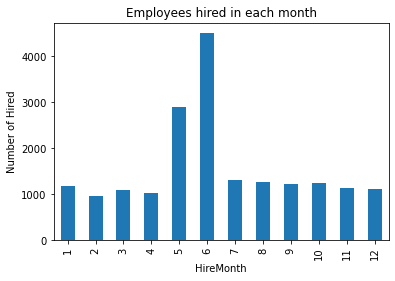

In [35]:
# Employee hiring vs Month
data.groupby(['HireMonth'])['AnnualSalary'].count().plot.bar()
plt.ylabel('Number of Hired')
plt.title('Employees hired in each month')
plt.show()

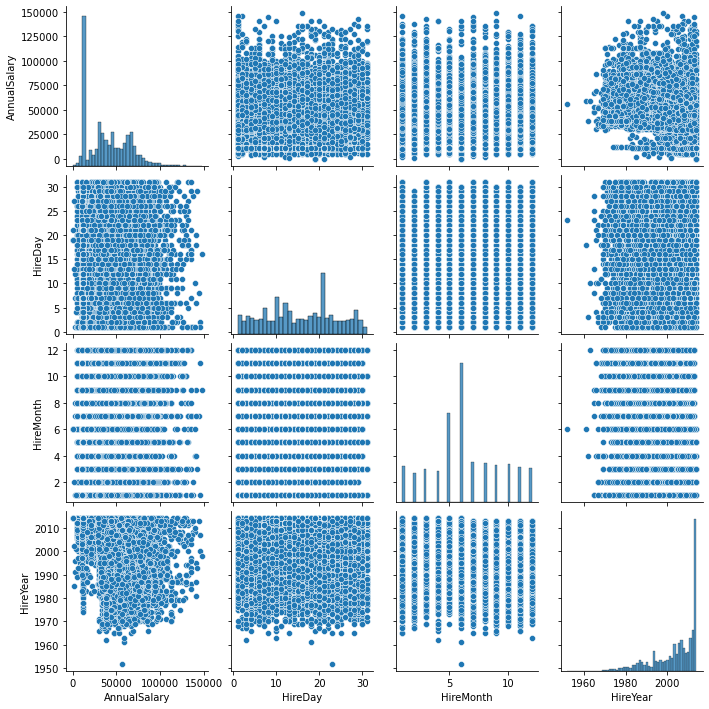

In [36]:
sns.pairplot(data)
plt.show()

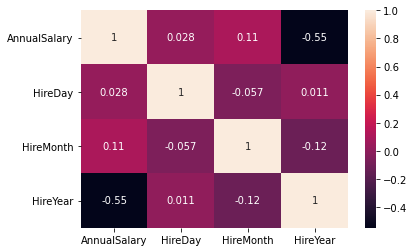

In [37]:
sns.heatmap(data.corr(),annot = True)

plt.show()

In [38]:
mean_job = data.groupby('JobTitle')['AnnualSalary'].mean()
data['JobTitle'] = data['JobTitle'].map(mean_job)


mean_agencyID = data.groupby('AgencyID')['AnnualSalary'].mean()
data['AgencyID'] = data['AgencyID'].map(mean_agencyID)


mean_agency = data.groupby('Agency')['AnnualSalary'].mean()
data['Agency'] = data['Agency'].map(mean_agency)

In [39]:
data

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",11313.967200,11310.000000,11310.270645,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",47443.500000,46667.000000,51495.424242,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",69750.666667,65926.133333,64874.560224,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",57940.000000,48071.851064,39980.900360,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",44531.160494,44012.307229,61506.879579,07/24/2013,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",11313.967200,11310.000000,11310.270645,05/21/2014,11310.0,21,5,2014
18977,"Zotamou,Pivot D",11313.967200,11310.000000,11346.315789,05/21/2014,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",44531.160494,44012.307229,61506.879579,12/17/2013,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",60588.139335,60203.340426,61506.879579,01/23/2013,44104.0,23,1,2013


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18895 non-null  object 
 1   JobTitle      18895 non-null  float64
 2   AgencyID      18895 non-null  float64
 3   Agency        18895 non-null  float64
 4   HireDate      18895 non-null  object 
 5   AnnualSalary  18895 non-null  float64
 6   HireDay       18895 non-null  int64  
 7   HireMonth     18895 non-null  int64  
 8   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [41]:
data.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'HireDay', 'HireMonth', 'HireYear'],
      dtype='object')

In [42]:
x = {'JobTitle', 'AgencyID', 'Agency', 'HireDay', 'HireMonth', 'HireYear'}
y = 'AnnualSalary'

In [43]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3)
x_train = train[x]
y_train = train[y]
x_test = test[x]
y_test = test[y]

In [44]:
print(x_train.shape)
print(x_test.shape)

(13226, 6)
(5669, 6)


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train[x_train.columns] = sc.fit_transform(x_train[x_train.columns])

In [46]:
x_train.describe()

,AgencyID,HireMonth,JobTitle,HireYear,Agency,HireDay
count,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04
mean,-7.077357e-16,1.030079e-17,-4.873699e-17,-4.044608e-15,-9.871634e-16,-7.896468e-17
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.686562e+00,-1.820540e+00,-1.541655e+00,-4.994468e+00,-1.395661e+00,-1.770147e+00
25%,-1.267779e+00,-4.612502e-01,-1.158821e+00,-5.841146e-01,-1.342619e+00,-8.130869e-01
50%,8.992703e-02,-1.214276e-01,-1.432568e-01,2.787805e-01,1.468115e-01,2.434078e-02
75%,9.017822e-01,5.582175e-01,8.665052e-01,8.540439e-01,1.050481e+00,7.421359e-01
max,4.642415e+00,1.917508e+00,4.166963e+00,9.499212e-01,2.242506e+00,1.818829e+00


In [47]:
x_test[x_test.columns] = sc.transform(x_test[x_test.columns])

In [48]:
x_test.describe()

,AgencyID,HireMonth,JobTitle,HireYear,Agency,HireDay
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,0.008054,0.013986,0.005600,-0.004471,0.009467,-0.012653
std,1.004738,1.006706,1.002081,0.987778,1.005577,1.010802
min,-1.686562,-1.820540,-1.623861,-3.652186,-1.395661,-1.770147
25%,-1.267779,-0.461250,-1.158821,-0.488237,-1.342619,-0.813087
50%,0.094525,-0.121428,-0.145671,0.278781,0.146812,0.024341
75%,0.913884,0.898040,0.866505,0.854044,1.050481,0.742136
max,3.131628,1.917508,4.166963,0.949921,2.242506,1.818829


In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

output = model.fit(x_train, y_train)

In [50]:
# R^2 score
output.score(x_train, y_train)

0.9651351182428143

In [51]:
# R^2 score for test data
output.score(x_test, y_test)

0.9651669882741771

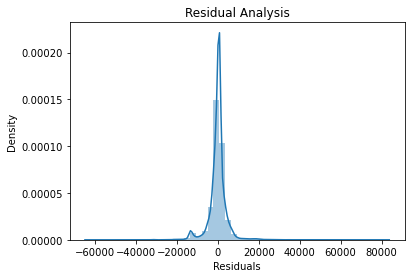

In [52]:
y_train_pred = output.predict(x_train)
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Residuals')
plt.title('Residual Analysis')
plt.show()

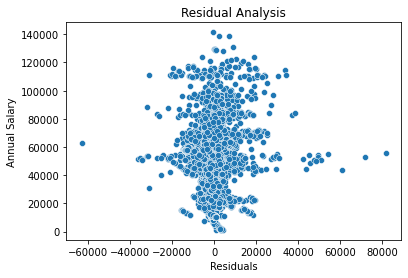

In [53]:
sns.scatterplot(x = res, y = y_train_pred)
plt.xlabel('Residuals')
plt.ylabel('Annual Salary')
plt.title('Residual Analysis')
plt.show()

In [54]:
# Coefficients
print(output.coef_)

[ 2.79974220e+03 -9.73206368e+01  2.23083776e+04 -2.14781847e+03
 -1.80450694e+03 -2.20474178e+01]


In [55]:
# Intercept
print(output.intercept_)

39488.36881596854


# predicted salary = 

                                39488.36881596854 + 
                                2.79974220e+03 * AgencyID +
                                -9.73206368e+01 * HireMonth +
                                2.23083776e+04 * JobTitle +
                                -2.14781847e+03 * HireYear +
                                -1.80450694e+03 * Agency + 
                                -2.20474178e+01 * HireDay